Сначала создадим сигнал x(t)=f(t) на заданном временном отрезке. 
---

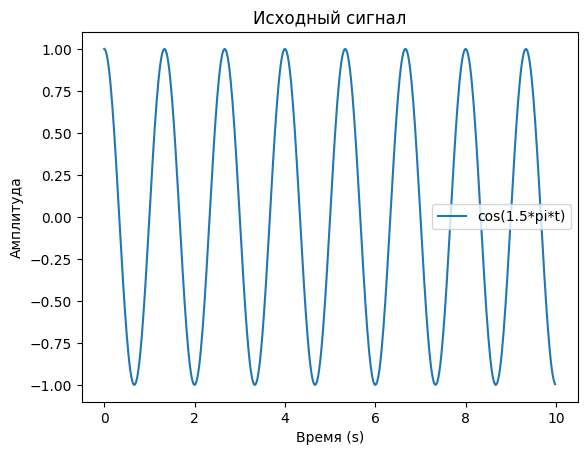

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры сигнала
T1 = 0
T2 = 10
t = np.arange(T1, T2, 0.02)
x = np.cos(1.5*np.pi*t)  # Пример функции

plt.plot(t, x, label='cos(1.5*pi*t)')
plt.xlabel('Время (s)')
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')
plt.legend()
plt.show()



Теперь мы создадим набор данных, используя 3-7 предыдущих значений для прогнозирования следующего
---

In [5]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for _ in range(time_step):
        data = np.insert(data, 0,0)
        
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
   
    return np.array(X), np.array(y)

# Преобразование данных
time_step = 5  # Например, 5 предыдущих значений
X, y = create_dataset(x, time_step)

# Разделение на обучающую, валидационную и тестовую выборки
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
for i in range(0, 6):
    print("Вход: ",X_train[i], "Выход:", y_train[i])


Вход:  [1.         0.99556196 0.98228725 0.96029369 0.92977649] Выход: 0.8910065241883679
Вход:  [-0.50904142 -0.42577929 -0.33873792 -0.24868989 -0.15643447] Выход: -0.06279051952931522
Вход:  [-0.80901699 -0.75011107 -0.68454711 -0.61290705 -0.53582679] Выход: -0.4539904997395469
Вход:  [0.50904142 0.42577929 0.33873792 0.24868989 0.15643447] Выход: 0.0627905195293133
Вход:  [0.61290705 0.68454711 0.75011107 0.80901699 0.86074203] Выход: 0.9048270524660184
Вход:  [-0.18738131 -0.27899111 -0.36812455 -0.4539905  -0.53582679] Выход: -0.6129070536529753


In [4]:
X.shape

(500, 5)

Используем Min-Max масштабирование:
---

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Преобразуем y
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()
for i in range(1, 6):
    print("Вход: ",X_train[i], "Выход:", y_train[i])

Вход:  [0.24547929 0.28693443 0.33063104 0.37565506 0.42164007] Выход: 0.4686047402353424
Вход:  [0.0954915  0.12472852 0.15772645 0.19354647 0.2318971 ] Выход: 0.2730047501302265
Вход:  [0.75452071 0.71281879 0.66936896 0.62434494 0.57811314] Выход: 0.5313952597646566
Вход:  [0.80645353 0.84223463 0.87505553 0.9045085  0.93035383] Выход: 0.9524135262330091
Вход:  [0.40630934 0.36034663 0.31593772 0.27300475 0.2318971 ] Выход: 0.19354647317351237


Построение полносвязной нейронной сети
---

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Полносвязная сеть
model_dense = Sequential()
model_dense.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_dense.add(Dense(32, activation='relu'))
model_dense.add(Dense(1))

model_dense.compile(optimizer='adam', loss='mean_squared_error')
model_dense.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16)


Epoch 1/100


c:\Users\kasi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2696 - val_loss: 0.0390
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0180 - val_loss: 0.0100
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - val_loss: 0.0036
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2800e-04 - val_loss: 0.0034
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0887e-04 - val_loss: 0.0033
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6184e-05 - val_loss: 0.0033
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4569e-05 - val_loss: 0.0033
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4729e-05 - val_loss: 0.0033
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9402e-05 - val_loss: 0.0034
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6223e-05 - val_loss: 0.0033
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

Построение GRU сети
---

In [11]:
from tensorflow.keras.layers import GRU

# GRU сеть
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_gru.add(GRU(32))
model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, 
               validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val), 
               epochs=100, batch_size=16)


Epoch 1/100


c:\Users\kasi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0857 - val_loss: 0.0251
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0140 - val_loss: 0.0135
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093 - val_loss: 0.0120
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 - val_loss: 0.0116
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - val_loss: 0.0110
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0066 - val_loss: 0.0103
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062 - val_loss: 0.0095
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - val_loss: 0.0086
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 - val_loss: 0.0077
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - val_loss: 0.0076
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037 - val_loss: 0.0064
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - val_l

Оценка моделей
-----

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Прогнозирование
y_pred_dense = model_dense.predict(X_test)
y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

# Оценка качества
rmse_dense = np.sqrt(mean_squared_error(y_test, y_pred_dense))
r2_dense = r2_score(y_test, y_pred_dense)

rmse_gru = np.sqrt(mean_squared_error(y_test, y_pred_gru))
r2_gru = r2_score(y_test, y_pred_gru)

print(f'Dense RMSE: {rmse_dense}, R2: {r2_dense}')
print(f'GRU RMSE: {rmse_gru}, R2: {r2_gru}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Dense RMSE: 0.0007670653585314706, R2: 0.9999951249345426
GRU RMSE: 0.0030896730683216992, R2: 0.9999209065051383


Графики Dense
-------

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step


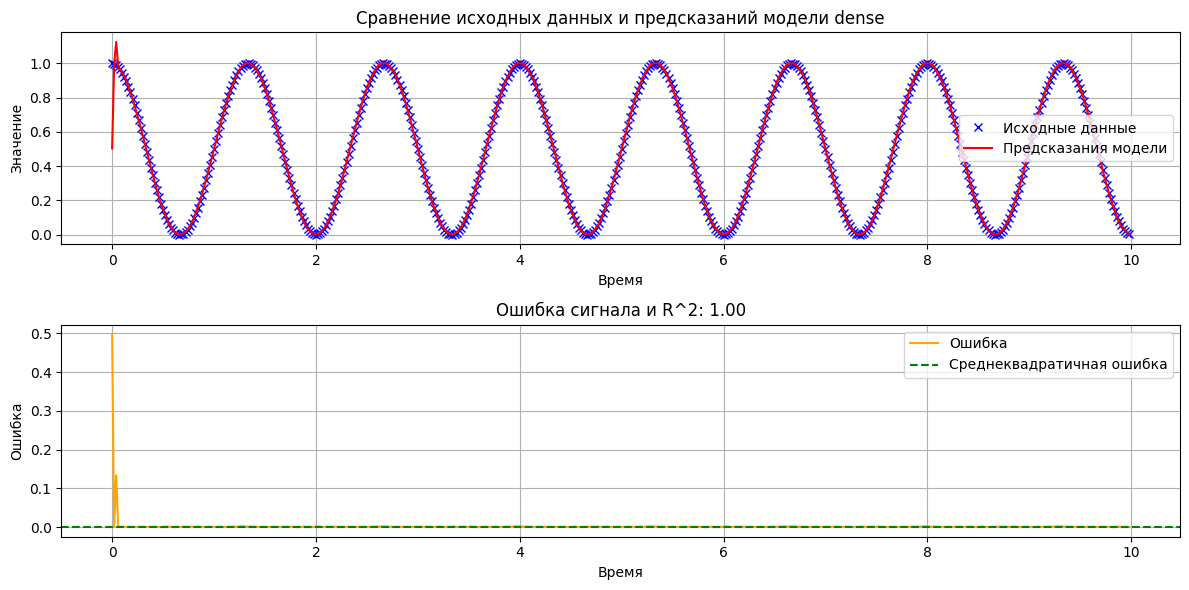

In [13]:
x = np.cos(1.5*np.pi*t)
x_inp, y = create_dataset(x, time_step)
x_inp = scaler.fit_transform(x_inp)
pred = model_dense.predict(x_inp)
x = scaler.fit_transform(x.reshape(-1, 1))


error = mean_squared_error(x, pred)
r2 = r2_score(x, pred)

# Построение графика
plt.figure(figsize=(12, 6))

# График исходных данных и предсказаний
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Исходные данные', color='blue', marker='x', linestyle='')
plt.plot(t, pred, label='Предсказания модели', color='red')
plt.title('Сравнение исходных данных и предсказаний модели dense')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.grid()

# График ошибки и R^2
plt.subplot(2, 1, 2)
plt.plot(t, np.abs(x - pred), label='Ошибка', color='orange')
plt.axhline(y=error, color='green', linestyle='--', label='Среднеквадратичная ошибка')
plt.title(f'Ошибка сигнала и R^2: {r2:.2f}')
plt.xlabel('Время')
plt.ylabel('Ошибка')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Графики GRU
---------------


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


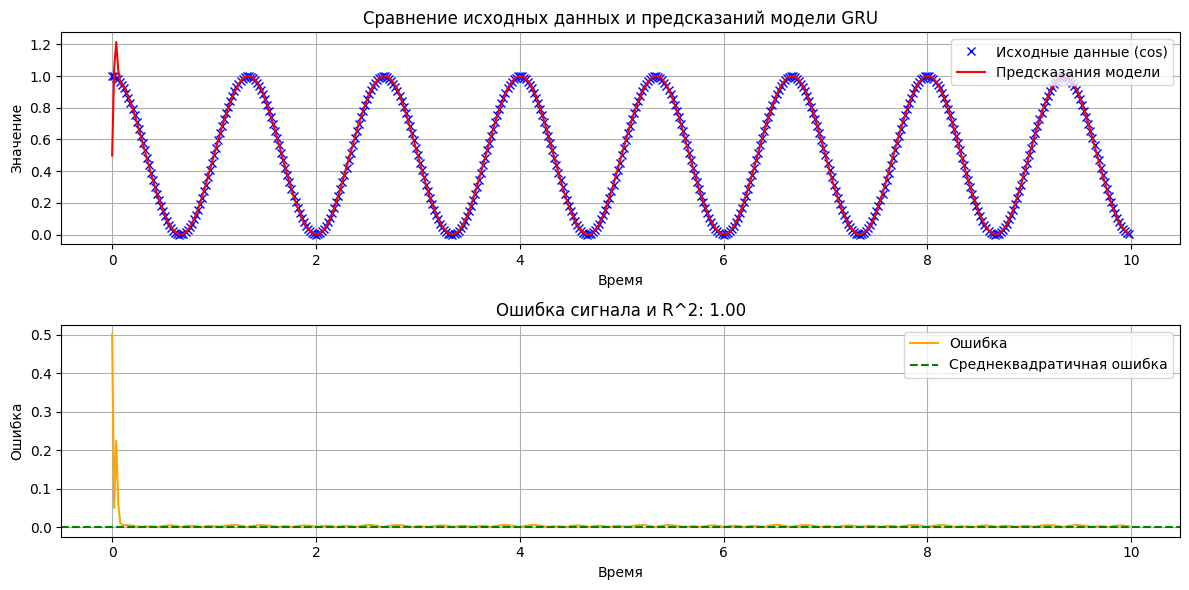

In [14]:
x = np.cos(1.5*np.pi*t)
x_inp, y = create_dataset(x, time_step)
x_inp = scaler.fit_transform(x_inp)
pred = model_gru.predict(x_inp.reshape(x_inp.shape[0], x_inp.shape[1], 1))
x = scaler.fit_transform(x.reshape(-1, 1))


error = mean_squared_error(x, pred)
r2 = r2_score(x, pred)

# Построение графика
plt.figure(figsize=(12, 6))

# График исходных данных и предсказаний
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Исходные данные (cos)', color='blue', marker='x', linestyle='')
plt.plot(t, pred, label='Предсказания модели', color='red')
plt.title('Сравнение исходных данных и предсказаний модели GRU')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.grid()

# График ошибки и R^2
plt.subplot(2, 1, 2)
plt.plot(t, np.abs(x - pred), label='Ошибка', color='orange')
plt.axhline(y=error, color='green', linestyle='--', label='Среднеквадратичная ошибка')
plt.title(f'Ошибка сигнала и R^2: {r2:.2f}')
plt.xlabel('Время')
plt.ylabel('Ошибка')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
